<a href="https://colab.research.google.com/github/athahibatullah/llm-from-scratch/blob/main/04%20-%20Implementing%20a%20GPT%20model%20from%20Scratch%20to%20Generate%20Text/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 Coding an LLM Architecture**

Now, we will code the other building blocks of an LLM and assemble them into a GPT-like model that we will train in the next chapter to generate human-like text

LLMs, such as GPT (Generative Pretrained Transformer), are large deep neural network architectures designed to generate new text one word (or token) at a time. Figure 4.1.1 provides a top-down view of a GPT-like LLM, with its main componentes highlighted.

We have already covered several aspects of the LLM architecture, such as input tokenization and embedding and the masked multi-head attention module. Now, we will implement the core structure of the GPT model, including its transformer blocks, which we will later train to generate human-like text.

Previously, we implement small embedding dimension for simplicity and concept understanding. Now, we are scaling up to the size of a small GPT-2 model (124 million parameter).

In the context of deep learning and LLMs like GPT, the term "parameters" refers to the trainable weights of the model. These weights are essentially the internal variables of the model that are adjusted and optimized during the training process to minimize a specific loss function. This optimization allows the model to learn from the training data.

<figure>
<img src="https://drive.google.com/uc?id=1CiXF6NOIVpbtA8zyb2dJpcCUsTqyy_N-">
<figcaption>Figure 4.1.1</figcaption>
</figure>

For example, in a neural network layer that is represented by a 2048x2048 dimensional matrix of weights, each element of matrix is a parameter, which mean total of parameter is 2048x2048 = 4,194,304 parameters.

**GPT-2 vs GPT-3**

Note that we are focusing on GPT-2 because OpenAI has made the weights of the pretrained model publicly available, which we will load into our implementation in chapter 6, GPT-3 is fundamentally the same in terms of model architecture, except that it is scaled up from 1.5 billion parameters in GPT-2 to 175 billion parameters in GPT-3, and it is trained on more data. GPT-2 is also a better choice for learning how to implement LLMs, as it can be run on a single laptop computer, whereas GPT-3 requires a GPU cluster for training and inference.

We specify the configuration of the small GPT-2 model via the following Python dictionary, which we will use in the code examples later:

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In the GPT_CONFIG_124M dictionary, we use concise variable names for clarity and to prevent long lines of code:
* vocab_size: vocabulary from BPE tokenizer on chapter 2 with 50257 words
* context_length: Denotes the maximum number of input tokens the model can handle via the positional embeddings (chapter 2)
* emb_dim: represents the embedding size, transforming each token into a 768-dimensional vector
* n_heads: indicates the count of attention heads in the multi-head attention mechanism (chapter 3)
* n_layers: specifies the number of transformer block in the model, which we will cover in the upcoming discussion
* drop_rate: Indicates the intensity of the dropout mechanism (0.1 implies a 10% random drop out of hidden units) to prevent overfitting (chapter 3)
* qkv_bias: determines whether to include a bias vector in the Linear layers of the multi-head attention for query, key, and value computations. We will intially disable this, following the norms of modern LLMs, but we will revisit it in chapter 6 when we load pretrained GPT-2 weights from OpenAI into our model (chapter 6)

We will use this configuration to get the picture of how all of this assemble by implementing a GPT placeholder architecture (DummyGPTModel) shown in figure 4.1.2. The numbered boxes is the order which we tackle the individual concepts required to code the final GPT architecture. We will start with step 1, a placeholder GPT backbone we will call DummyGPTModel.

<figure>
<img src="https://drive.google.com/uc?id=17LZK6sPa0ErExSwo7Q3ktwGTaqwNpM5D">
<figcaption>Figure 4.1.2</figcaption>
</figure>

In [ ]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

The DummyGPTModel class in this code defines a simplified version of a GPT-like model using PyTorch's neural network module (nn.Module). The model architecture in the DummyGPTModel class consists of token and positional embeddings, dropout, a series of transformer blocks (DummyTransformerBlock), a final layer normalization (DummyLayerNorm), and a linear output layer (out_head). The configuration is passed in via a Python dictionary, for instance, the GPT_CONFIG_124M dictionary we created earlier.

The forward method describes the data flow through the model: it computes token and positional embeddings for the input indices, applies dropout, processes the data through the transformer blocks, applies normalization, and finally produces logits with the linear output layer.

The code in above is already functional. However, for now, note that we use placeholders (DummyLayerNorm and DummyTransfomerBlock) for the transformer block and layer normalization, which we will develop later.

Next, we will prepare the input data and initialize a new GPT model to illustrate its usage. Building on our coding of the tokenizer (chapter 2), let's now consider a high-level overview of how data flows in and out of a GPT model, as shown in figure 4.1.3.

To implement these steps, we tokenize a batch consisting of two text inputs for the GPT model using the tiktoken tokenizer from chapter 2:

<figure>
<img src="https://drive.google.com/uc?id=1cW-93BCt6kB-tiy8jYQ-Ply0-CJwInEt">
<figcaption>Figure 4.1.3</figcaption>
</figure>

In [ ]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


Next, we initialize a new 124-million parameter DummyGPTModel instance and feed it to the tokenized batch

In [ ]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)

logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


The output tensor has two rows corresponding to the two text samples. Each sample consists of four tokens; each token is a 50257-dimensional vector, which matches the size of the tokenizer's vocabulary.

The embedding has 50257 dimensions because each of these dimensions refers to a unique token in the vocabulary. When we implement the postprocessing code, we will convert these 50257-dimensional vectors back into token IDs, which we can then decode into words.

Now that we have taken a top-down look at the GPT architecture and its inputs and outputs, we will code the individual placeholders, starting with the real layer normalization class that will replace the DummyLayerNorm in the previous code.

# **4.2 Normalizing Activations with Layer Normalization**

Training deep neural networks with many layers can sometimes prove challenging due to problems like vanishing or exploding gradients. These problems lead to unstable training dynamics and make it difficult for the network to effectively adjust its weights, which means the learning process struggles to find a set of parameters (weight) for the neural network that minimizes the loss function. In other words, the network has difficulty learning the underlying patterns in the data to a degree that would allow it to make accurate predictions or decisions.

Let's now implement layer normalization to improve the stability and efficiency of neural network training. The main idea behind layer normalization is to adjust the activations (outputs) of a neural network layer to have a mean of 0 and a variance of 1, also known as unit variance. This adjustment speeds up the convergence to effective weights and ensures consistent, reliable training. In GPT-2 and modern transformer architectures, layer normalization is typically applied before and after the multi-head attention module, and, as we have seen with the DummyLayerNorm placeholder, before the final output layer. Figure 4.2.1 provides a visual overview of how layer normalization functions.

<figure>
<img src="https://drive.google.com/uc?id=1VYRWycSCRfNnesiCBYbUFdWa3tYGKxo7">
<figcaption>Figure 4.2.1</figcaption>
</figure>

An illustration of layer normalization where the six outputs of the layer, also called activations, are normalized such that they have a 0 mean and a variance of 1.

We can recreate the example shown in Figure 4.2.1 via the following code, where we implement a neural network layer with five inputs and six outputs that we apply to two input examples:

In [ ]:
torch.manual_seed(123)

# create 2 training examples with 5 dimensions (features) each
batch_example = torch.randn(2, 5)

layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


The first row lists the layer outputs for the first input and the second row lists the layer outputs for the second row.

The neural network layer we have coded consists of a Linear layer followed by a non-linear activation function, ReLU (Rectified Linear Unit), which is a standard activation function in neural networks. ReLU is simply thresholds negative inputs to 0, ensuring that a layer outputs only positive values, which explains why the resulting layer output does not contain any negative values. Later, we will use another, more sophisticated activation function in GPT.

Before we apply layer normalization to these outputs, let's examine the mean and variance:

In [ ]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


The first row in the mean tensor here contains the mean value for the first input row, and the second output row contains the mean for the second input row.

Using keepdim=True in operations like mean or variance calculation ensures that the output tensor retains the same number of dimensions as the input tensor, even though the operation reduces the tensor along the dimension specified via dim. For instance, without keepdim=True,the returned mean tensor would be a two-dimensional vector [0.1324], [0.2170] instead of a 2x1-dimensional matrix [[0.1324],[0.2170]].

The dim parameter specifies the dimension along which the calculation of the statistic (here, mean or variance) should be performed in tensor.


<img src="https://drive.google.com/uc?id=1-J0Rpso0qAweMsoA75yfwLISp_a_mTp1">

As figure 4.2.2 explains, a two-dimensional tensor (like a matrix), using dim=-1 for operations such as mean or variance calculation is the same as using dim=1. This is because -1 refers to the tensor's last dimension, which corresponds to the columns in a two-dimensional vector. Later, when adding layer normalization to the GPT model, which produces three-dimensional tensors with the shape [batch_size, num_tokens, embedding_size], we can still use dim=-1 for normalization across the last dimension, avoiding a change from dim=1 to dim=2.

Next, let's apply layer normalization to the layer outputs we obtained earlier. The operation consists of subtracting the mean and dividing by the square root of the variance (standar deviation):

In [ ]:
out_norm = (out - mean) / torch.sqrt(var)
print("Normalized layer outputs:\n", out_norm)

mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


As we can see based on the results, the normalized layer outputs, which now also contain negative values, have 0 mean and a variance of 1

As we can see, the output of mean contain e-09 and e-08. This is a scientific notation and these value is very small and close to zero.

To improve readability, we can also turn off the scientific notation when printing tensor values by setting sci_mode to False:

In [ ]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<figure>
<img src="https://drive.google.com/uc?id=1VcR5xSUoOGXv3GjzOKOI1x24pKMrpv9Y">
<figcaption>Figure 4.2.3</figcaption>
</figure>

We have coded and applied layer normalization in a step-by-step process. Let's now encapsulate this process in a PyTorch module that we can use in the GPT model later

In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

This specific implementation of layer normalization operates on the last dimension of the input tensor x, which represents the embedding dimension (emb_dim). The variable eps is a small constant (epsilon) to avoid division by zero, same as ϵ in earlier formula. The scale and shift are two trainable parameters (of the same dimension as the input) that the LLM automatically adjusts during training if it is determined that doing so would improve the model's performance on its training task. This allows model to learn appropriate scaling and shifting that best suit the data it is processing.

**Biased variance**

We use unbiased=false on our variance calculation method earlier. In the variance calculation, we divide by the number of inputs n in the variance formula. This approach does not apply Bessel's correction, which typically uses n-1 instead of n in the denominator to adjust for bias in sample variance estimation. This decision results in a so called biased estimate of the variance. For LLMs, where the embedding dimension n is significantly large, the difference between using n and n-1 is practically negligible. This approach is chosen to ensure compability with the GPT-2 model's normalization layers and because it reflects TensorFlow's default behavior, which was used to implement the original GPT-2 model. Using a similar setting ensures our method is compatible with the pretrained weights we will load in chapter 6.

Let's now try the LayerNorm module in practice and apply it to the batch input:

In [ ]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)

In [ ]:
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


The results show that the layer normalization code works as expected and normalizes the values of each of the two inputs such that they have a mean of 0 and a variance of 1

We have now covered two of the building blocks we will need to implement the GPT architecture, as shown in figure 4.2.4

<figure>
<img src="https://drive.google.com/uc?id=1yuuM28VnvGe5QXI7C45mZ9KgrNrhZc3P">
<figcaption>Figure 4.2.3</figcaption>
</figure>

**Layer normalization vs batch normalization**

If you are familiar with batch normalization, a common and traditional normalization method for neural networks, you may wonder how it compares to layer normalization. Unlike batch normalization, which normalizes across the batch dimension, layer normalization normalizes across the feature dimension. LLMs often require significant computational resources, and the available hardware or the specific use case can dictate the batch size during training or inference. Since layer normalization normalizes each input independently of the batch size, it offers more flexibility and stability in these scenarios. This is particularly beneficial for distributed training or when deploying models in environments where resources are constrained.

# **4.3 Implementing a Feed Forward Network with GELU Activations**

Next, we will implement a small neural network submodule used as part of the transformer block in LLMs. We begin by implementing the GELU activation function, which plays a crucial role in this neural network submodule.

Historically, the ReLU activation function has been commonly used in deep learning due to its simplicity and effectiveness across various neural network architectures. However, in LLMs, several other activation functions are employed beyond the traditional ReLU. Two notable examples are GELU (Gaussian Error Linear Unit) and SwiGLU (Swish-Gated Linear Unit).

GELU and SwiGLU are more complex and smooth activation functions incorporating Gaussian and sigmoid-gated linear units, respectively. They offer improved performance for deep learning models, unlike the simpler ReLU.

The GELU activation function can be implemented in several ways; the exact version is defined as GELU(x)=x.Φ(x), where Φ(x) is the cumulative distribution function of the standard Gaussian distribution. In practice, however, it's common to implement a computationally cheaper approximation (the original GPT-2 model was also trained with this approximation, which was found via curve fitting):

$\text{GELU}(x) \approx 0.5 \cdot x \cdot \left(1 + \tanh\left[\sqrt{\frac{2}{\pi}} \cdot \left(x + 0.044715 \cdot x^3\right)\right]\right)$

In [ ]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

Next, to get an idea of what this GELU function looks like and how it compares to the ReLU function, let's plot these functions side by side:

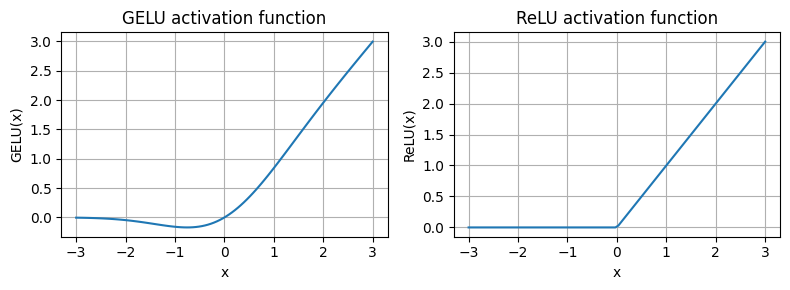

In [ ]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

As we can see in the resulting plot in figure above, ReLU (right) is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero. GELU (left) is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for almost all negative values (except at approximately x=-0.75).

The smoothness of GELU can lead to better optimization properties during training, as it allows for more nuanced adjustments to the model's parameters. In contrast, ReLU has a sharp corner at zero (the right), which can sometimes make optimization harder, especially in networks that are very deep or have complext architectures. Moreover, unlike ReLU, which outputs zero for any negative input, GELU allows for a small, non-zero output for negative values. This characteristic means that during the training process, neurons that receive negative input can still contribute to the learning process, albeit to a lesser extent than positive inputs.

Next, let's use the GELU function to implement the small neural network module, FeedForward, that we will be using in the LLM's transformer block later.

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

As we can see, the FeedForward module is a small neural network consisting of two Linear layers and a GELU activation. In the 124-million-parameter GPT model, it receives the input batches with tokens that have an embedding size of 768 each via the GPT_CONFIG_124M dictionary where GPT_CONFIG_124["emb_dim"] = 768. Figure 4.3.1 shows how the embedding size is manipulated inside this small feed forward neural network when we pass it some inputs.

<figure>
<img src="https://drive.google.com/uc?id=1csPhozLKb6hAkmOSKYNPFRYSthki18Wr">
<figcaption>Figure 4.3.1</figcaption>
</figure>

In [ ]:
print(GPT_CONFIG_124M["emb_dim"])

768


Following the example in figure 4.3.1, let's initialize a new FeedForward module with a token embedding size of 768 and feed it a batch input with two samples and three tokens each:

In [ ]:
ffn = FeedForward(GPT_CONFIG_124M)

# input shape: [batch_size, num_token, emb_size]
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


As we can see, the shape of the output tensor is the same as that of the input tensor.

The FeedForward module plays a crucial role in enhancing the model's ability to learn from and generalize the data. Although the input and output dimensions of this module are the same, it internally expands the embedding dimension into a higher-dimensional space through the first linear layer, as illustrated in figure 4.3.2. This expansions is followed by a nonlinear GELU activation and then a contraction back to the original dimension with the second linear transformation. Such a design allows for the exploration of a richer representation space.

<figure>
<img src="https://drive.google.com/uc?id=1j-BfKNJMH6SJ91RvWrwPzVvehR9bLWtd">
<figcaption>Figure 4.3.2</figcaption>
</figure>

Moreover, the uniformity in input and output dimensions simplifies the architecture by enabling the stacking of multiple layers, as we will do later, without the need to adjust dimensions between them, thus making the model more scalable.

**Explanation from GPT:**
<figure>
<img src="https://drive.google.com/uc?id=1_epA9rfqECJ4H641Z8llgLILDJzCul8c">
<figcaption>Figure 4.3.3</figcaption>
</figure>

So Why Expand Then Shrink?
1. More expressive power (non-linearity)
By expanding from 768 to 3072, the network:

* Gets more “room” to transform information

* Can represent more complex relationships

* Learns richer features via the non-linear GELU activation

If we didn’t expand, the non-linearity would be more constrained — like trying to paint a mural with only a pencil.

2. Efficiency trade-off
You might ask: why not just make the embedding size huge from the start?

Because:

* Keeping the main embedding size smaller (768) is cheaper for memory, speed, and communication across layers.

* We expand only within the feedforward network temporarily, not globally.

So you get a burst of capacity → then compress it again.

3. Transformer design choice (originally in Vaswani et al., 2017)
This design comes from the original Transformer paper, where they found this structure:

**dff=4⋅dmodel**

to be a good empirical sweet spot. In GPT-2:

dmodel=768

dff=3072

Analogy:
Imagine you’re processing a sentence in your brain:

* First, you expand your thoughts to explore many interpretations (768 → 3072)

* Then, you summarize your insight to pass to the next person (3072 → 768)

Same concept.

As figure 4.3.4 shows, we have now implemented most of the LLM's building blocks. Next, we will go over the concept of shortcut connections that we insert between different layers of a neural network, which are important for improving the training performance in deep neural network architectures.

<img src="https://drive.google.com/uc?id=1ijRFoUiy-ux8oYXzStFOU8C8VCikfcUn">

# **4.4 Adding Shortcut Connections**

Let's discuss the concept behind shortcut connections, also known as skip or residual connections. Originally, shortcut connections were proposed for deep networks in computer vision (specifically, in residual networks) to mitigate the challenge of vanishing gradients. The vanishing gradient problem refers to the issue where gradients (which guide weight updates during training) become progressively smaller as they propagate backward through the layers, making it difficult to effectively train earlier layers.

Figure 4.4 shows that a shortcut connection creates an alternative, shorter path for the gradient to flow through the network by skipping one or more layers, which is achieved by adding the output of one layer to the output of a later layer. This is why these connections are also known as skip connections. They play a crucial role in preserving the flow of gradients during the backward pass in training.

In the following code, we implement the neural network in figure 4.4 to see how we can add shortcut connections in the forward method.

<figure>
<img src="https://drive.google.com/uc?id=1W9tccRBS9cmqNNiXbaA_PNnvQULvwu4B">
<figcaption>Figure 4.4</figcaption>
</figure>

In [ ]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

The code implements a deep neural network with five layers, each consisting of a Linear layer and a GELU activation function. In the forward pass, we iteratively pass the input through the layers and optionally add the shortcut connections if the self.use_shortcut attribute is set to True.

Let's use this code to initialize a neural network without shortcut connections. Each layer will be initialized such that it accepts an example with three input values and returns three output values. The last layer returns a single output value:

In [ ]:
layer_sizes = [3, 3, 3, 3, 3, 1]

sample_input = torch.tensor([[1., 0., -1.]])

torch.manual_seed(123)
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)

In [ ]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

This code specifies a loss function that computes how close the model output and a user-specified target (here, for simplicity, the value 0) are. Then, when calling loss.backward(), PyTorch computes the loss gradient for each layer in the model. We can iterate through the weight parameters via model.named_parameters(). Suppose we have a 3x3 weight parameter matrix for a given layer. In that case, this layer will have 3x3 gradient values, and we print the mean absolute gradient of these 3x3 gradient value to obtain a single gradient value per layer to compare the gradients between layers more easily.

In short, the .backward() method is a convenient method in PyTorch that computes loss gradients, which are required during model training, without implementing the math for the gradient calculation ourselves, thereby making working with deep neural networks much more accessible.

Let's now use the print_gradients function and apply it to the model without skip connections:

In [ ]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


The output of the print_gradients function shows, the gradients become smaller as we progress from the last layer (layers.4) to the first layer (layers.0), which is a phenomenon called the vanishing gradient problem.

Let's now instantiate a model with skip connections and see how it compares:

In [ ]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


The last layer (layers.4) still has a larger gradient than the other layers. However, the gradient value stabilizes as we progress toward the first layer (layers.0) and doesn't shirnk to a vanishingly small value.

In conclusions, shortcut connections are important for overcoming the limitations posed by the vanishing gradient problem in deep neural networks. Shortcut connections are a core building block of very large models such as LLMs, and they will help facilitate more effective training by ensuring consistent gradient flow across layers when we train the GPT model in the next chapter.

Next, we'll connect all of the previously covered concepts (layer normalization, GELU activations, feed forward module, and shortcut connections) in a transformer block, which is the final building block we need to code the GPT architecture.

# **4.5 Connecting Attention and Linear Layers in a Transformer Block**

Now, let's implement the transformer block, a fundamental building block of GPT and other LLM architectures. This block, which is repeated a dozen times in the 124-million-parameter GPT-2 architecture, combines several concepts we have previously covered: multi-head attention, layer normalization, dropout, feed forward layers, and GELU activations. Later, we will connect this transformer block to the remaining parts of the GPT architecture.

Figure 4.5.1 shows a transformer block that combines several components, including the masked multi-head attention module (see chapter 3) and the FeedForward module we previously implemented (section 4.3). When a transformer block processes an input sequence, each element in the sequence (for example, a word or subword token) is represented by a fixed-size vector (in this case, 768 dimensions). The operations within the transformer block, including multi-head attention and feed forward layers, are designed to transform these vectors in a way that preserves their dimensionality.

The idea is that the self-attention mechanism in the multi-head attention block identifies and analyzes relationships between elements in the input sequence. In contrast, the feed forward network modifies  the data individually at each position. This combination not only enables a more nuanced understanding and processing of the input but also enhances the model's overall capacity for handling complex data patterns.

<figure>
<img src="https://drive.google.com/uc?id=1gEg-nKHgHMWIOZh1PMVuv3xH8gG65rJj">
<figcaption>Figure 4.5.1</figcaption>
</figure>

In [ ]:
pip install import-ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00


In [24]:
# If the `previous_chapters.py` file is not available locally,
# you can import it from the `llms-from-scratch` PyPI package.
# For details, see: https://github.com/rasbt/LLMs-from-scratch/tree/main/pkg
# E.g.,
# from llms_from_scratch.ch03 import MultiHeadAttention
from ch03 import MultiHeadAttention


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

The given code defines a TransformerBlock class in PyTorch that includes a multi-head attention mechanism (MultiHeadAttention) and a feed forward network (FeedForward), both configured based on a provided configuration dictionary (cfg), such as GPT_CONFIG_124M.

Layer normalization (LayerNorm) is applied before each of these two components, and dropout is applied after them to regularize the model and prevent overfitting. This is also known as Pre-LayerNorm. Older architectures, such as the original transformer model, applied layer normalization after the self-attention and feed forward networks instead, known as Post-LayerNorm, which often leads to worse training dynamics.

The class also implements the forward pass, where each component is followed by a shortcut connection that adds the input of the block to its output. This critical feature helps gradients flow through the network during training and improves the learning of deep models (section 4.4).

Using the GPT_CONFIG_124M dictionary we defined earlier, let's instantiate a transformer block and feed it some sample data:

In [25]:
torch.manual_seed(123)

x = torch.rand(2, 4, 768)  # Shape: [batch_size, num_tokens, emb_dim]
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)

print(output)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])
tensor([[[ 0.1648,  0.4002, -0.0749,  ...,  1.2646,  0.3324,  0.7243],
         [ 0.0293,  0.0498,  0.2529,  ...,  0.4698,  0.1281,  0.9749],
         [ 0.5532,  0.5788, -0.0310,  ...,  1.1544,  0.3947,  0.7600],
         [ 0.1631,  0.7128,  0.7271,  ...,  0.3312,  0.5730,  0.9258]],

        [[ 0.1787,  1.1682,  0.5810,  ...,  0.1828,  0.0073, -0.5603],
         [-0.2920,  0.6318,  0.2002,  ...,  0.3218,  0.4670, -0.0383],
         [ 0.9275,  0.4203,  0.3183,  ...,  0.3771,  0.7190, -0.1205],
         [ 0.6035,  0.5767,  0.3411,  ...,  1.3798,  1.2683,  0.3916]]],
       grad_fn=<AddBackward0>)


As we can see, the transfomer block maintains the input dimensions in its output, indicating that the transformer architecture processes sequences of data without altering their shape throughout the network.

The preservation of shape throughout the transformer block architecture is not incidental but a crucial aspect of its design. This design enables its effective aplication across a wide range of sequence-to-sequence tasks, where each output vector directly corresponds to an input vector, maintaining a one-to-one relationship. However, the output is a context vector that encapsulates information from the entire input sequence (chapter 3). This means that while the physical dimensions of the sequence (length and feature size) remain unchanged as it passes through the transformer block, the content of each output vector is re-encoded to integrate contextual information from across the entire input sequence.

With the transformer block implemented, we now have all the building blocks needed to implement the GPT architecture. As illustrated in figure 4.5.2, the transformer block combines layer normalization, the feed forward network, GELU activations, and shortcut connections. As we will eventually see, this transformer block will make up the main component of the GPT architecture.

<figure>
<img src="https://drive.google.com/uc?id=1KSWRwBfpHvcqlHt9OReZE-h55p_O6GVu">
<figcaption>Figure 4.5.2</figcaption>
</figure>

# **4.6 Coding the GPT Model**

We started this chapter with a big-picture overview of a GPT architecture that we called DummyGPTModel. In this DummyGPTModel code implementation, we showed the input and outputs to the GPT model, but its building blocks remained a black box using a DummyTransformerBlock and DummyLayerNorm class as placeholders.

Let's now replace the DummyTransformerBlock and DummyLayerNorm placeholders with the real TransformerBlock and LayerNorm classes we coded previously to assemble a fully working version of the original 124-million-parameter version of GPT-2. In chapter 5, we will pretrain a GPT-2 model, and in chapter 6, we will load in the pre-trained weights from OpenAI.

Before we assemble the GPT-2 model in code, let's look at its overall structure, as shown in figure 4.6, which includes all the concepts we have covered so far. As we can see, the transformer block is repeated many times throughout a GPT model architecture. In the case of the 124-million-parameter GPT-2 model, it's repeated 12 times, which we specify via the n_layers entry in the GPT_CONFIG_124M dictionary. This transform block is repeated 48 times in the largest GPT-2 model with 1542 million parameters.

The output from the final transformer block then goes through a final layer normalization step before reaching the linear output layer. This layer maps the transformer's output to a high-dimensional space (in this case, 50257 dimensions, corresponding to the model's vocabulary size) to predict the next token in the sequence.

<figure>
<img src="https://drive.google.com/uc?id=1FTmCB00wouv1De2vNbkKQvO5dxab9Dlm">
<figcaption>Figure 4.6</figcaption>
</figure>

In [26]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        # the device= setting will allow us to train the model on a CPU or GPU, depending on which
        # device the input data sits on.
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

Thanks to the TransformerBlock class, the GPTModel class is relatively small and compact.

The init constructor of this GPTModel class initializes the token and positional embedding layers using the configurations passed in via a Python dictionary, cfg. These embedding layers are responsible for converting input token indices into dense vectors and adding positional information (chapter 2).

Next, the init method creates a sequential stack of TransformerBlock modules equal to the number of layers specified in cfg. Following the transformer blocks, a LayerNorm layer is applied, standardizing the outputs from the transformer blocks to stabilize the learning process. Finally, a linear output head without bias is defined, which projects the transformer's output into the vocabulary space of the tokenizer to generate logits for each token in the vocabulary.

The forward method takes a batch of input token indices, compute their embeddings, applies the positional embeddings, passes the sequence through the transformer blocks, normalizes the final output, and then computes the logits, representing the next token's unnormalized probabilities. We will convert these logits into tokens and text outputs in the next section.

Let's now intialize the 124-million-parameter GPT model using the GPT_CONFIG_124M dictionary we pass into the cfg parameter and feed it with the batch text input we previously created:

In [27]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


The input batch text is:
* txt1 = "Every effort moves you" -> [6109, 3626, 6100,  345]
* txt2 = "Every day holds a" -> [6109, 1110, 6622,  257]

As we can see, the output tensor has the shape [2, 4, 50257], since we passed in two input texts with four tokens each. The last dimension, 50257, corresponds to the vocabulary size of the tokenizer. Later, we will see how to convert each of these 50257-dimensional output vectors back into tokens.

Before we move on to coding the function that converts the model outputs into text, let's spend a bit more time with the model architecture itself and analyze its size. Using the nume1() method, short for "number of elements", we can collect the total number of parameters in the model's parameter tensors:

In [28]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


Before, we initializing a 124-million-parameter GPT model, so why is the actual number of parameters 163 million?

The reason is a concept called weight tying, which was used in the original GPT-2 architecture. It means that the original GPT-2 architecture reuses the weights from the token embedding layer in its output layer. To understand better, let's take a look at the shapes of the token embedding layer and linear output layer that we initialized on the model via the GPTModel earlier:

In [29]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


As we can see, the weight tensors for bot these layers have the same shape.

The token embedding and output layers are very large due to the number of rows for the 50257 in the tokenizer's vocabulary. Let's remove the output layer parameter count from the total GPT-2 model count according to the weight tying:

In [30]:
total_params_gpt2 =  total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


total output layer parameter = embedding size * vocabulary size = 38,597,376

Number of trainable parameters considering weight tying = total number of parameters - total output layer parameter

= 163,009,536 - 38,597,376

= 124,412,160

As we can see, the model is now only 124 million parameters large, matching the original size of the GPT-2 model.

Weight tying reduces the overall memory footprint and computational complexity of the model. However, using separate token embedding and output layers result in better training and model performance; hence, we use separate layers in our GPTModel implementation. The same is true for modern LLMs. However, we will revisit and implement the weight tying concept layer in chapter 6 when we load the pretrained weights from OpenAI.

Lastly, let's compute the memory requirements fo the 163 million parameters in our GPTModel object:

In [31]:
# Calculate the total size in bytes (assuming float32, 4 bytes per parameter)
total_size_bytes = total_params * 4

# Convert to megabytes
total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


In conclusion, by calculating the memory requirements for the 163 million parameters in our GPTModel object and assuming each parameter is a 32-bit float taking up 4 bytes, we find that the total size of the model amounts to 621.83 MB, illustrating the relatively large storage capacity required to accommodate even relatively small LLMs.

Now that we've implemented the GPTModel architecture and saw that it outputs numeric tensors of shape [batch_size, num_tokens, vocab_size], let's write the code to convert these output tensors into text.

# **4.7 Generating Text**

We will now implement the code that converts the tensor outputs of the GPT model back into text. Before we get started, let's briefly review how a generative model like an LLM generates text one word/token at a time.

Figure 4.7.1 illustrates the step-by-step process by which a GPT model generates text given an input context, such as "Hello, I am". With each iteration, the input context grows, allowing the model to generate coherent and contextually appropriate text. By the sixth iteration, the model has constructed a complete sentence: "Hello, I am a model ready to help". We've seen that our current GPTModel implementation outputs tensors with shape [batch_size, num_token, vocabulary_size]. Now the question is how does a GPT model go from these output tensors to the generated text?

<figure>
<img src="https://drive.google.com/uc?id=1xKDnANymIbEtXwjhkJKrleWj42vbHp4u">
<figcaption>Figure 4.7.1</figcaption>
</figure>

The process by which a GPT model goes from output tensors to generated text involves several steps, as illustrated in figure 4.7.2. These steps include decoding the output tensors, selecting tokens based on a probability distribution, and converting these tokens into human-readable text.

The next-token generation process detailed in figure 4.7.2 illustrates a single step where the GPT model generates the next token given its input. In each step, the model outputs a matrix with vectors representing potential next tokens. The vector corresponding to the next token is extracted and converted into a probability distribution via the softmax function. Within the vector containing the resulting probability scores, the index of the highest value is located, which translates to the token ID. This token ID is then decoded back into text, producing the next token in the sequence. Finally, this token is appended to the previous inputs, forming a new input sequence for the subsequent iteration. This step-by-step process enables the model to generate text sequentially, building coherent phrases and sentences from the inital input context.

In practice, we repeat this process over many iterations, such as shown in figure 4.7.1, until we reach a user-specified number of generated tokens. In code, we can implement the token-generation process as shown in the following listing.

<figure>
<img src="https://drive.google.com/uc?id=135VHVDfIfg-pHASBb5A1eOpFVHBMQX5J">
<figcaption>Figure 4.7.2</figcaption>
</figure>



In [32]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

This code demonstrates a simple implementation of a generative loop for a language model using PyTorch. It iterates for a specified number of new tokens to be generated, crops the current context to fit the model's maximum context size, computes predictions, and then selects the next token based on the highest probability prediction.

To code the generate_text_simple function, we use a softmax function to convert the logits into a probability distribution from which we identify the position with the highest value via torch.argmax. The softmax function is monotonic, meaning it preserves the order of its inputs when transformed into outputs. So, in practice, the softmax step is redundant since the position with the highest score in the softmax output tensor is the same position in the logit tensor. In other words, we could apply the torch.argmax function to the logits tensor directly and get identical results. However, the provided code illustrate the full process conversion of transforming logits to probabilities, which can add additional intuition so that the model generates the most likely next token, which is known as greedy decoding.

When we implement the GPT training code in the next chapter, we will use additional sampling techniques to modify the softmax outputs such that the model doesn't always select the most likely token. This introduces variablity and creativity in the generated text.

This process of generating one token ID at a time and appending it to the context using the generate_text_simple function is further illustrated in figure 4.7.3. We generate the token IDs in an iterative fashion. For instance, in iteration 1, the model is provided with the tokens corresponding to "Hello, I am," predicts the next token (with ID 257, which is "a"), and appends it to the input. This process is repeated untul the model produces the complete sentence "Hello, I am a model ready to help" after six iterations.

Let's now try out the generate_text_simple function with the "Hello, I am" context as model input. First, we encode the input context into token IDs:

In [33]:
start_context = "Hello, I am"

encoded = tokenizer.encode(start_context)
print("encoded:", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0) #Adds batch dimension from [4] to [1,4]
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


<figure>
<img src="https://drive.google.com/uc?id=1SnloK2eY_YoN9PEOBWnnDHQJVSjr9ceM">
<figcaption>Figure 4.7.3</figcaption>
</figure>


Next, we put the model into .eval() mode. This disables random components like dropout, which are only used during training, and use the generate_text_simple function on the encoded input tensor:

In [34]:
model.eval() # disable dropout

out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


Using the .decode method of the tokenizer, we can convert the IDs back into text:

In [35]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


As we can see, the model generated gibberish, which is not all like the coherent text "Hello, I am a model ready to help." What happened? The reason the model is unable to produce coherent text is that we haven't trained it yet. So far, we have only implemented the GPT architecture and initialized a GPT model instance with initial random weights. Model training is a large topic in itself, and we will tackle it in the next chapter.

**Exercise: Using separate dropout parameters**
At the beginning of this chapter, we defined a global drop_rate setting in the GPT_CONFIG_124M dictionary to set the dropout rate in variouse places throughout the GPTModel architecture. Change the code to specify a separate dropout value for the various dropout layers throughout the model architecture.

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate_embedding_layer": 0.1,       # Dropout rate for embedding layer
    "drop_rate_shortcut_layer": 0.2, # Dropout rate for shortcut layer
    "drop_rate_multi_head_attention_module": 0.3,        # Dropout rate for multi head attention module
    "qkv_bias": False       # Query-Key-Value bias
}

In [ ]:
from ch03 import MultiHeadAttention


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate_multi_head_attention_module"], # Dropout rate for multi head
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate_shortcut_layer"]) # Dropout rate for shortcut
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate_embedding_layer"]) # Dropout rate for embedding

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )
